# Problem Statement
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset..

# Algorithm :

Step 1: Import libraries and create alias for Pandas, Numpy and Matplotlib
    
Step 2: Import the Social_Media_Adv Dataset
    
Step 3: Initialize the data frame
    
Step 4: Perform Data Preprocessing
    
● Convert Categorical to Numerical Values if applicable

● Check for Null Value

● Covariance Matrix to select the most promising features

● Divide the dataset into Independent(X) and
Dependent(Y)variables.

● Split the dataset into training and testing datasets

● Scale the Features if necessary.

Step 5: Use Logistic regression( Train the Machine ) to Create Model
    
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression()

#fit the model with data
logreg.fit(xtrain,ytrain)

#y_pred=logreg.predict(xtest)

Step 6: Predict the y_pred for all values of train_x and test_x
    
Step 7:Evaluate the performance of Model for train_y and test_y
    
Step 8: Calculate the required evaluation parameters
    
from sklearn.metrics import
precision_score,confusion_matrix,accuracy_score,recall_score

cm= confusion_matrix(ytest, y_pred)

In [41]:
import numpy as np
import pandas as pd

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv(r"C:\Users\OM\Downloads\Social_Network_Ads.csv")

In [44]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [45]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [46]:
df.index

RangeIndex(start=0, stop=400, step=1)

In [47]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [48]:
df.shape

(400, 5)

In [49]:
df.ndim

2

In [50]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [51]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [53]:
# Drop userID column as it is not relevant for prediction
#df = df.drop('User ID', axis=1)

# Convert Gender to numerical values (e.g., Male=1, Female=0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [55]:
covariance_matrix = df.cov()
print("Covariance matrix: \n",covariance_matrix)
# Step 2: Identify highly correlated features
# In this example, let's consider features with covariance greater than a threshold
threshold = 0.5  # You can adjust this threshold based on your requirements
highly_correlated_pairs = ((covariance_matrix.abs() > threshold) & 
                           (covariance_matrix != 1.0))  # Exclude self-correlation

# Step 3: Select the most promising features
promising_features = set()
for feature in highly_correlated_pairs.columns:
    correlated_with_feature = highly_correlated_pairs.index[
        highly_correlated_pairs[feature]]
    promising_features.add(feature)
    promising_features.update(correlated_with_feature)

# Convert promising_features to a list if needed
promising_features = list(promising_features)

# Display the promising features
print("Most promising features based on covariance matrix:")
print(promising_features)

Covariance matrix: 
                       User ID       Gender           Age  EstimatedSalary  \
User ID          5.134915e+09  -905.617719   -541.682870     1.737143e+08   
Gender          -9.056177e+02     0.250526     -0.386917    -1.031404e+03   
Age             -5.416829e+02    -0.386917    109.890702     5.548738e+04   
EstimatedSalary  1.737143e+08 -1031.403509  55487.380952     1.162603e+09   
Purchased        2.448363e+02    -0.010201      3.131165     5.924367e+03   

                   Purchased  
User ID           244.836284  
Gender             -0.010201  
Age                 3.131165  
EstimatedSalary  5924.367168  
Purchased           0.230269  
Most promising features based on covariance matrix:
['Gender', 'Purchased', 'User ID', 'Age', 'EstimatedSalary']


In [56]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

<Axes: >

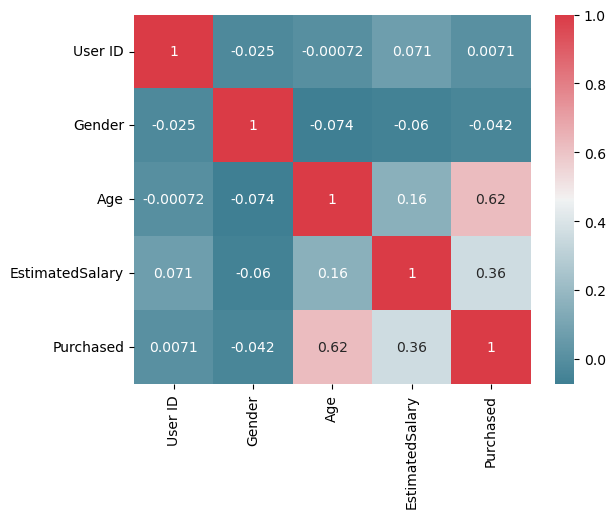

In [57]:
# Purchase is highly correlated with Age and EstimatedSalary
# Draw the heatmap with the mask and correct aspect ratio
import seaborn as sns
sns.heatmap(df.corr(),cmap=cmap,annot=True)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [59]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [60]:
# Splitting the dataset into features and target variable
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [61]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [63]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [66]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score
precision= precision_score(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
print("Precision: ",precision)
print("accuracy: ",accuracy)
print("Recall: ",recall)

Precision:  0.9230769230769231
accuracy:  0.9
Recall:  0.75


In [67]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[66  2]
 [ 8 24]]


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear pic

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belong

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actuall

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actua

These four outcomes are summarized in a confusion matrix given below.
Precision = TP / (TP + FP)
 
Recall = TP / (TP + FN) Also known as sensitivity, or True Positive Rate

F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [68]:
# Compute TP, FP, TN, FN
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

In [69]:
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ',TP)
print('\nTrue Negatives(TN) = ',TN)
print('\nFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ',FN )

Confusion matrix

 [[66  2]
 [ 8 24]]

True Positives(TP) =  24

True Negatives(TN) =  66

False Positives(FP) =  2

False Negatives(FN) =  8


In [70]:
Accuracy = (TN+TP)*100/(TP+TN+FP+FN)
Accuracy

90.0

In [71]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 0.9
Error Rate: 0.09999999999999998
Precision: 0.9230769230769231
Recall: 0.75


In [72]:
#using K-Fold cross validation to get the mean Accuracy
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(accuracies.mean(),accuracies.std()))

Mean Accuracy: 0.83, Std of Accuracy: 0.08


In [73]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='micro')
f1

0.9

In [74]:
# Compute the correlation matrix
corr = df.corr()
corr

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


C:\Users\OM\AppData\Local\Temp\ipykernel_5848\3439022481.py:4: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros_like(corr, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

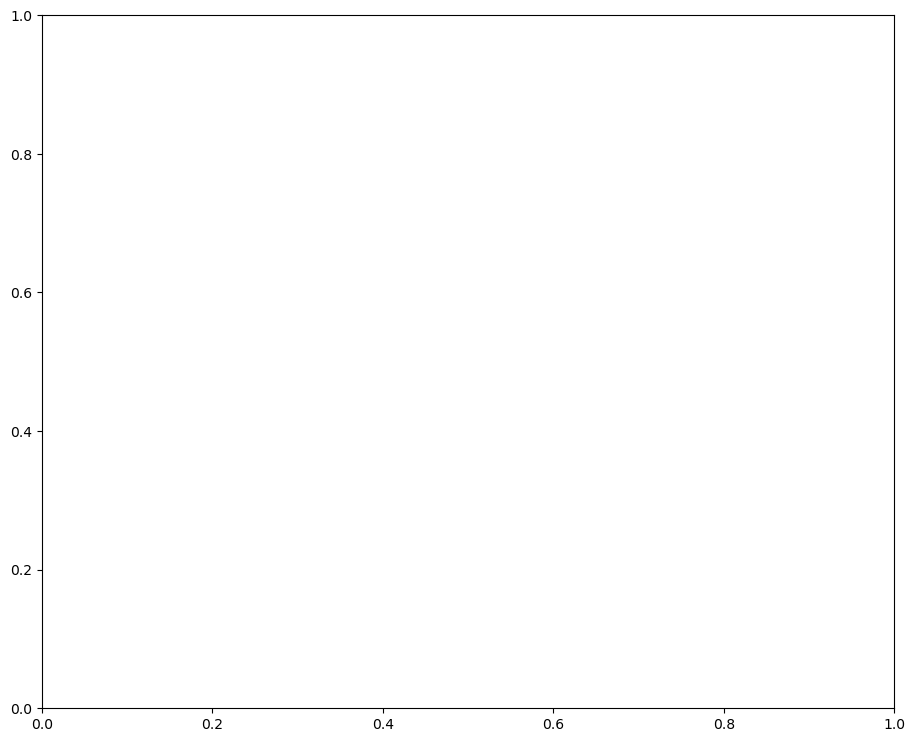

In [75]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True